In [225]:
import duckdb 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [226]:
# Avataan tietokanta ja valitaan oikea datasetti
def read_node(tbl: str, node_name: str):
    con = duckdb.connect(database=file)
    df = con.sql(f"SELECT * FROM {tbl} WHERE node_id = {node_name}").df()
    con.close()
    return df  

file = "data/duckdb.database"
tbl = "Silver_SensorData"
node = "3200"
df = read_node(tbl, node)

# Pienennetään dataa siten, että otetaan kuvan ulkopuolella olevat datapisteet pois
df_lim = df
df_lim = df_lim[(df_lim['x'] >= 305)]
df_lim = df_lim[(df_lim['x'] <= 1250)]
df_lim = df_lim[(df_lim['y'] <= 560)]
df_lim


node_id                  timestamp     x    y
13624       3200 2019-03-15 17:56:35.686716  1243  263
13625       3200 2019-03-15 17:56:35.686721  1243  263
13626       3200 2019-03-15 17:56:36.686693  1171  258
13627       3200 2019-03-15 17:56:36.686697  1171  258
13628       3200 2019-03-15 17:56:37.687728  1094  307
...          ...                        ...   ...  ...
1082367     3200 2020-01-20 20:24:41.470940   587  341
1082368     3200 2020-01-20 20:24:42.471130   565  363
1082369     3200 2020-01-20 20:24:43.471330   544  405
1082370     3200 2020-01-20 20:24:44.470883   532  453
1082371     3200 2020-01-20 20:24:45.471112   523  515

[4536 rows x 4 columns]

In [227]:
# Avataan ja sovitetaan kuva
img = plt.imread('kauppa.jpg')
img_height, img_width, _ = img.shape

## Ensin kokeilin piirtää pisteet karttaan, jotta voin pisteiden avulla luoda heatmapin

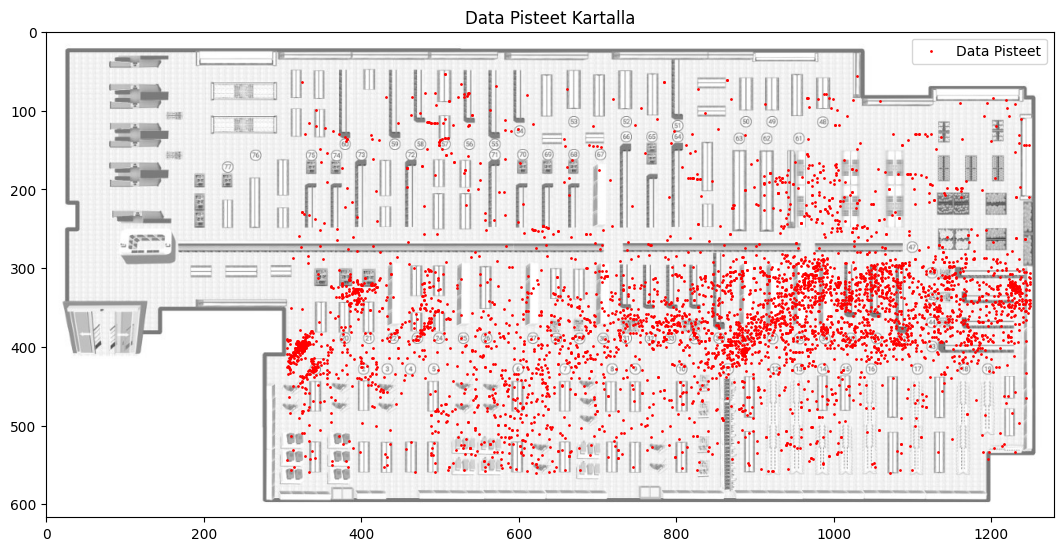

In [228]:
# Kuvan koko
fig, ax = plt.subplots(figsize=(13, 13))

# Näytetään kuva
ax.imshow(img)

# Lisätään datapisteet
ax.scatter(df_lim["x"], df_lim["y"], color="red", label="Data Pisteet", s=1)

# Otsikon asettaminen
ax.set_title("Data Pisteet Kartalla")

# Legendan näyttäminen
ax.legend()
plt.show()

## Tätä muokataan vielä

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/1432785346.py:5: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=df_lim, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/1432785346.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=df_lim, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


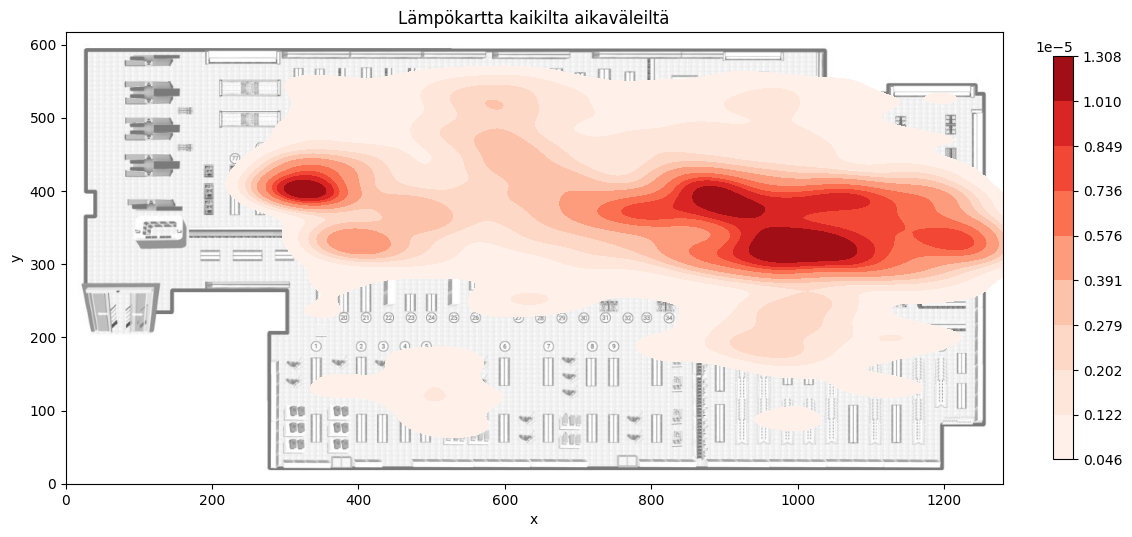

In [229]:
# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=df_lim, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta ja lisätään lämpöä osoittava pylväs
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title("Lämpökartta kaikilta aikaväleiltä")
plt.show()

## Piirretään nyt lämpökartat eri aikaväleille: 9.00-11.00; 11.00-13.00; 13.00-15.00; 15.00-17.00; 17.00-19.00; 19.00-21.00 (Pitää vielä muokata läpinäkyvyyttä esim)

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/2570282852.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/2570282852.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


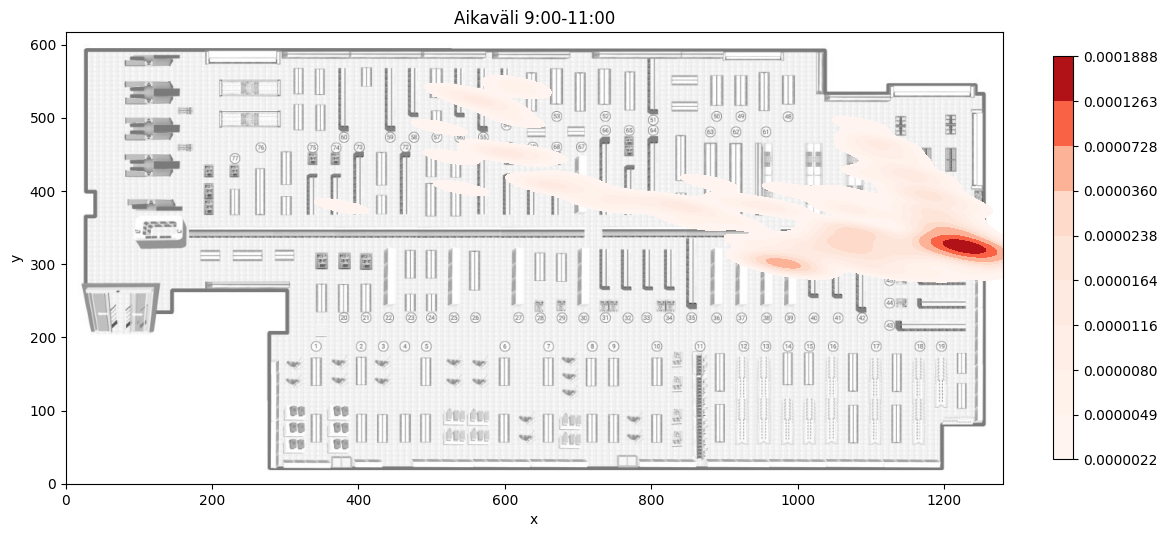

In [230]:
# Valittu aikaväli
start_hour = 9
end_hour = 11

# Rajataan vain väli 9:00-11:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3817157456.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3817157456.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


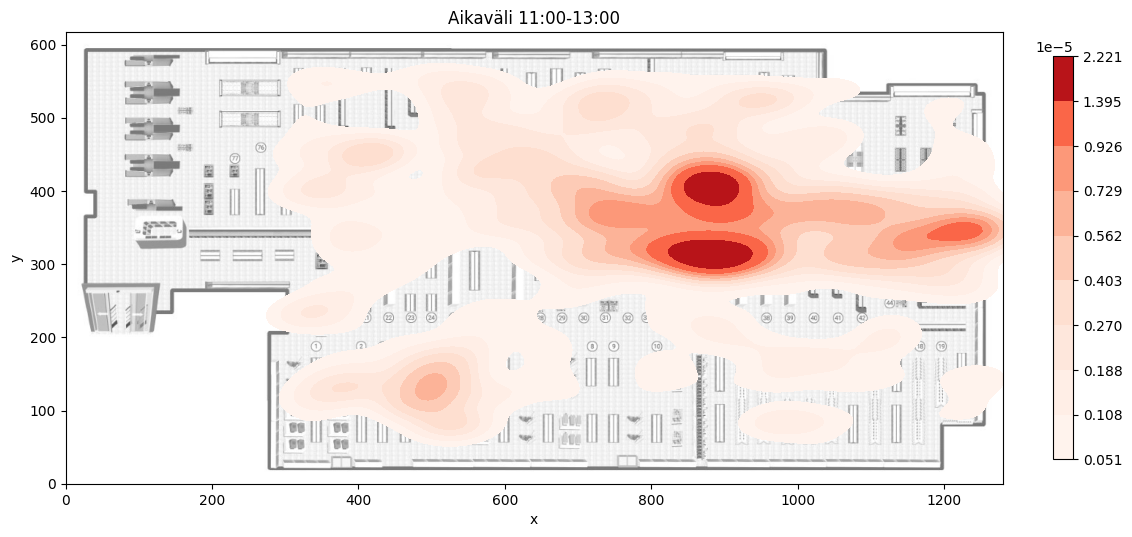

In [231]:
# Valittu aikaväli
start_hour = 11
end_hour = 13

# Rajataan vain väli 11:00-13:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3882571108.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3882571108.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


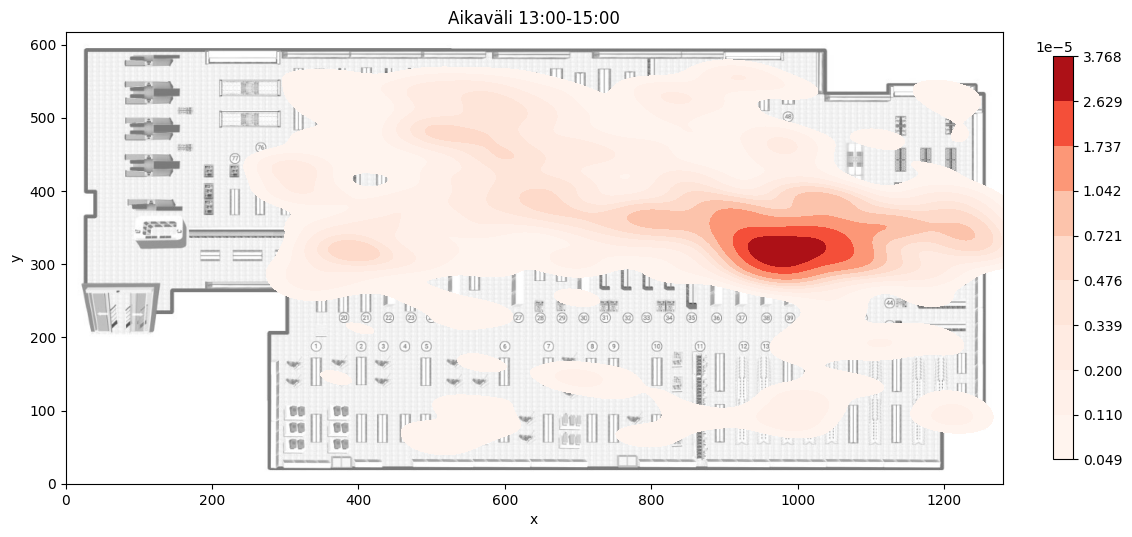

In [232]:
# Aikaväli
start_hour = 13
end_hour = 15

# Rajataan vain väli 13:00-15:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3707902170.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3707902170.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


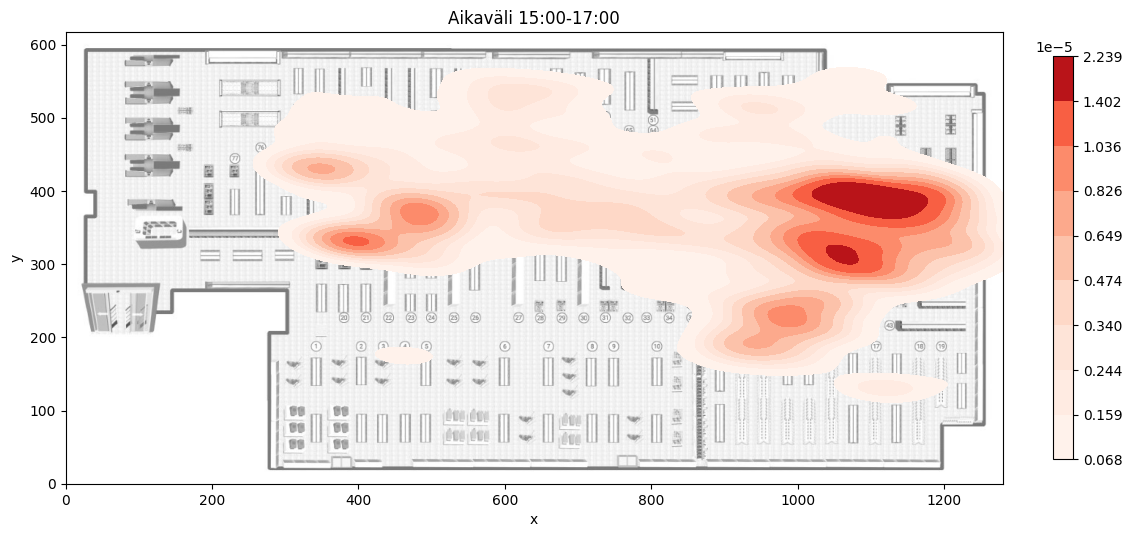

In [233]:
# Aikaväli 
start_hour = 15
end_hour = 17

# Rajataan vain väli 15:00-17:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/2541526716.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/2541526716.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


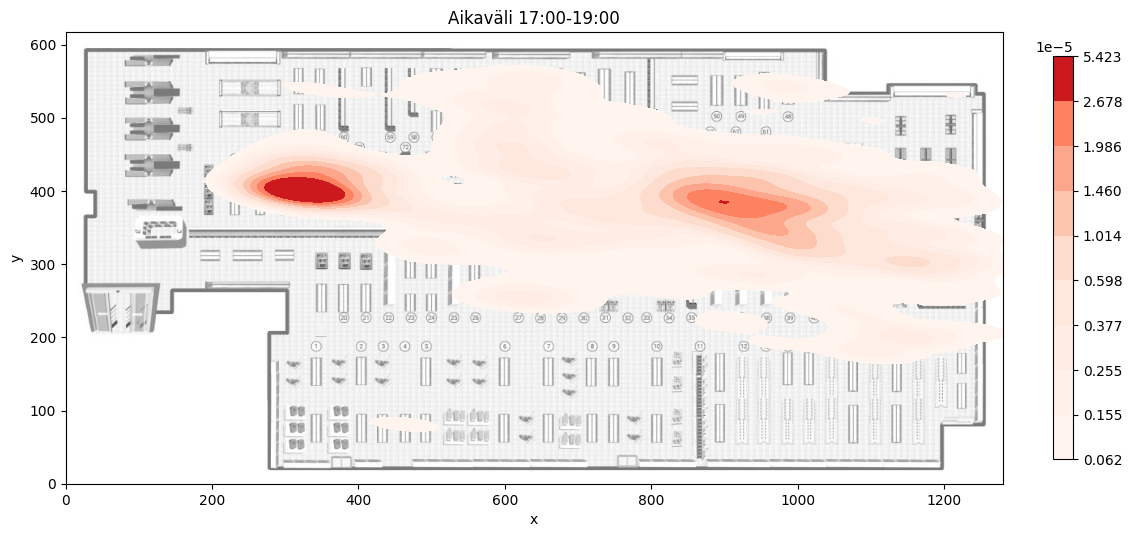

In [234]:
# Aikaväli
start_hour = 17
end_hour = 19

# Rajataan vain väli 17:00-19:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/1115894389.py:12: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/1115894389.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


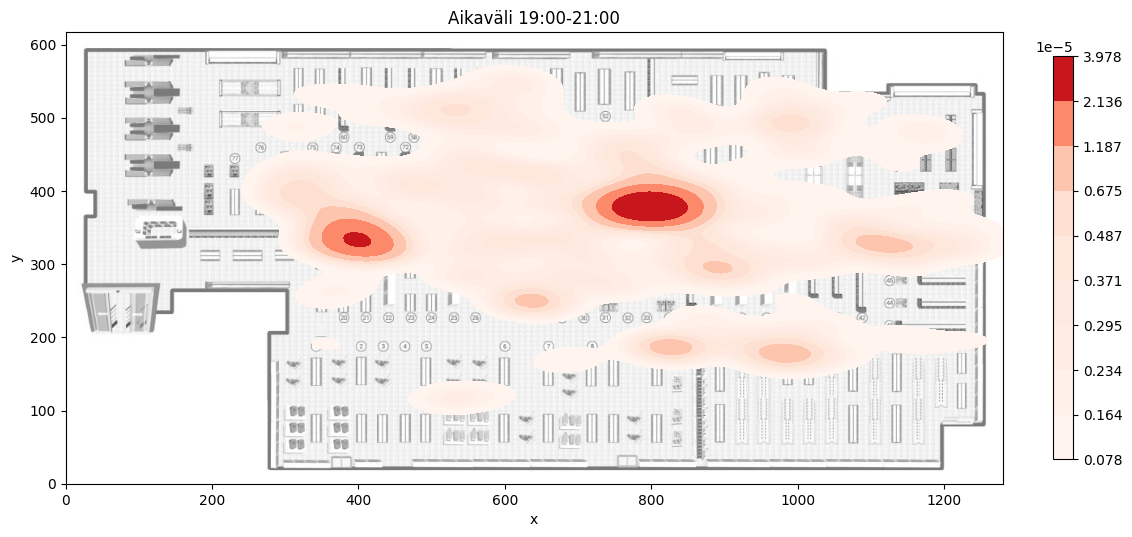

In [235]:
# Aikaväli
start_hour = 19
end_hour = 21

# Rajataan vain väli 19:00-21:00
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=selected_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Aikaväli {}:00-{}:00'.format(start_hour, end_hour))

# Näytä kuva
plt.show()

## Lämpökartat viikonpäivittäin (Maanantai, Tiistai, Keskiviikko, Torstai, Perjantai, Lauantai ja Sunnuntai)

In [236]:
# Tehdään funkito, jossa palautetaan viikonpäivät
def weekday(df_lim):
    df_lim['weekday'] = df_lim['timestamp'].dt.day_name()
    return df_lim

# Uusi frame
df_lim_weekday = weekday(df_lim)

# Printataan sisältö
print(df_lim_weekday['weekday'])

13624      Friday
13625      Friday
13626      Friday
13627      Friday
13628      Friday
            ...  
1082367    Monday
1082368    Monday
1082369    Monday
1082370    Monday
1082371    Monday
Name: weekday, Length: 4536, dtype: object


/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/161686196.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/161686196.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


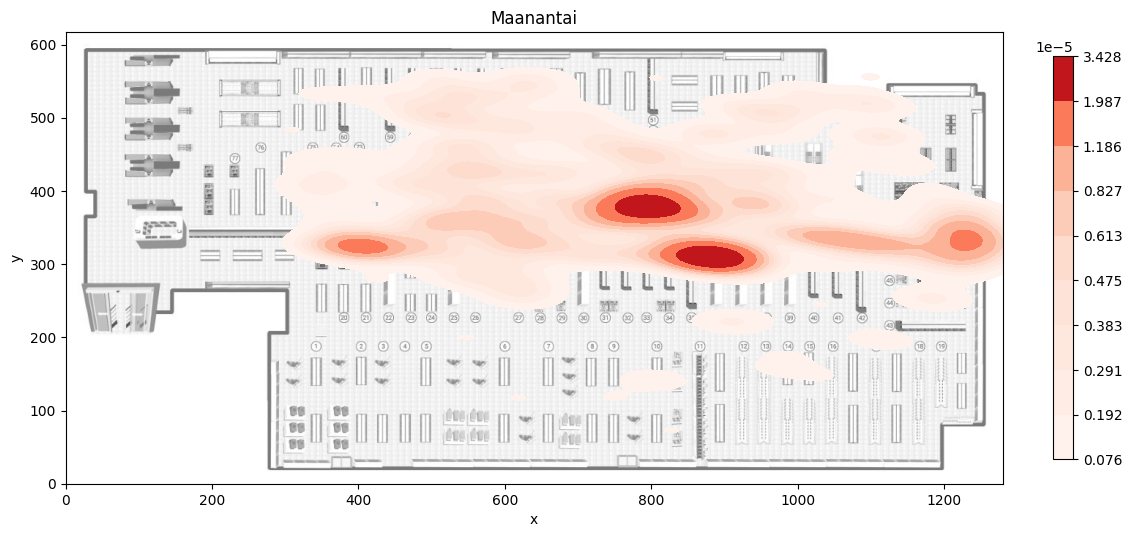

In [237]:
# Maanantai
weekday_data = df_lim_weekday[df_lim_weekday['weekday'] == 'Monday'] 

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Maanantai')

# Näillä komennoilla kuvat tallennettiin, jätän nämä talteen:
# save_dir = 'heatmap-animaatio/heatmap-viikonpäivä'
# plt.savefig(f'{save_dir}/heatmap_Monday.png')

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3103250588.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3103250588.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


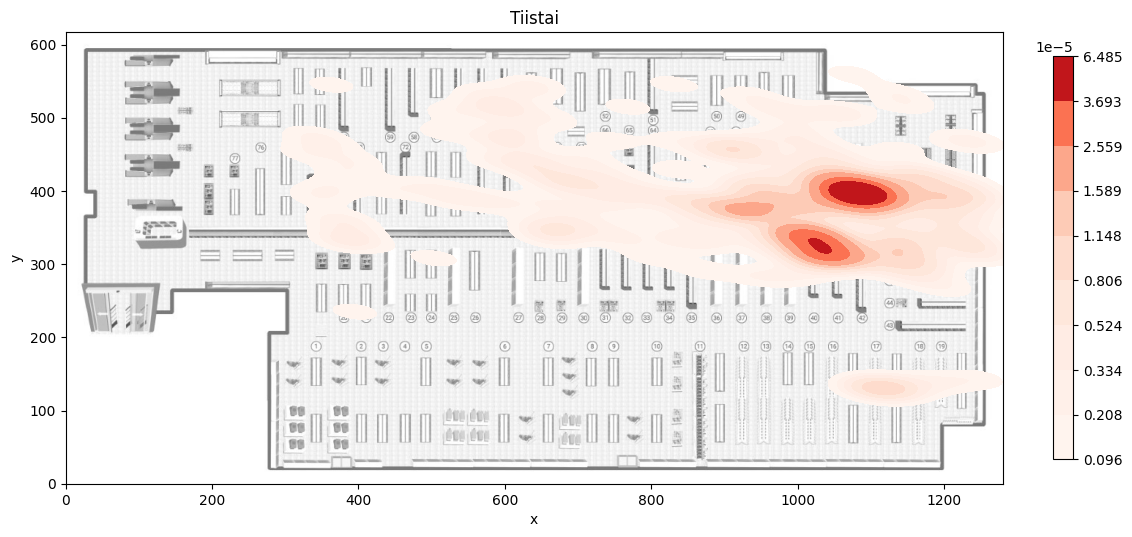

In [238]:
# Tiistai
weekday_data = df_lim_weekday[df_lim_weekday['weekday'] == 'Tuesday'] 

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Tiistai')

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/1574388356.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/1574388356.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


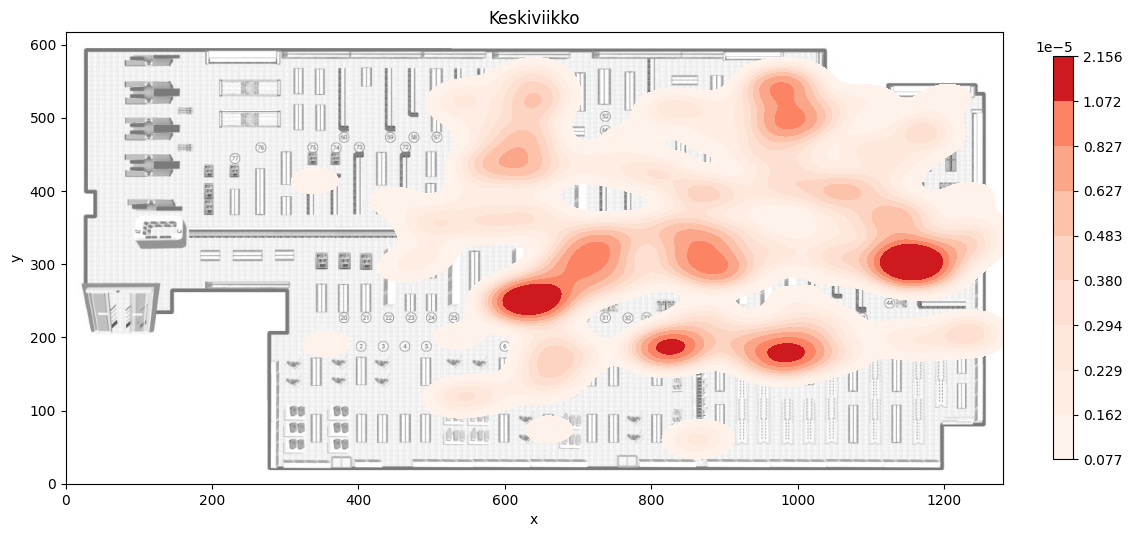

In [239]:
# Keskiviikko
weekday_data = df_lim_weekday[df_lim_weekday['weekday'] == 'Wednesday'] 

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Keskiviikko')

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3548480434.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3548480434.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


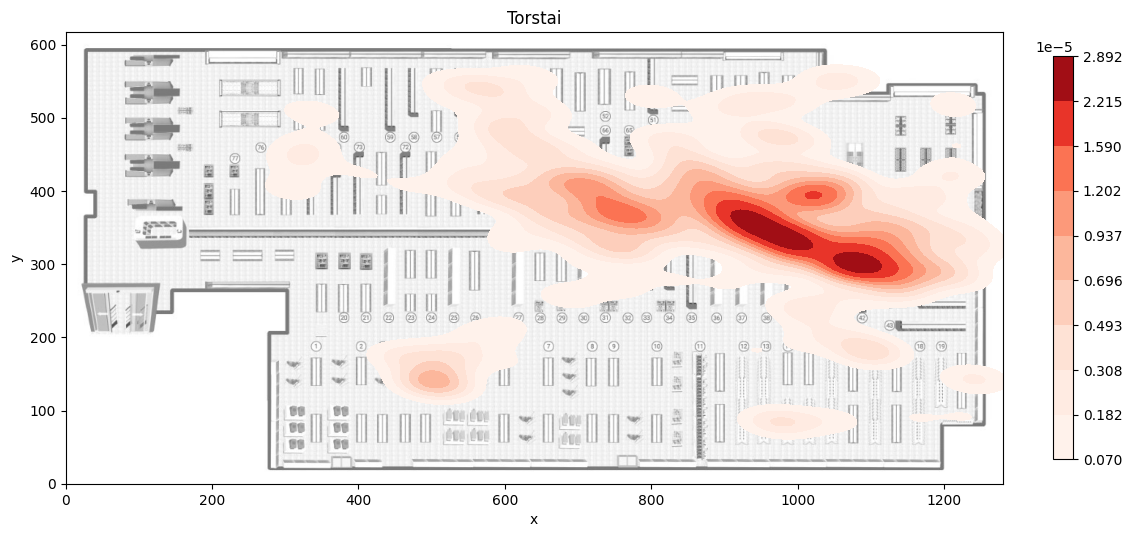

In [240]:
# Torstai
weekday_data = df_lim_weekday[df_lim_weekday['weekday'] == 'Thursday'] 

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Torstai')

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/4080333326.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/4080333326.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


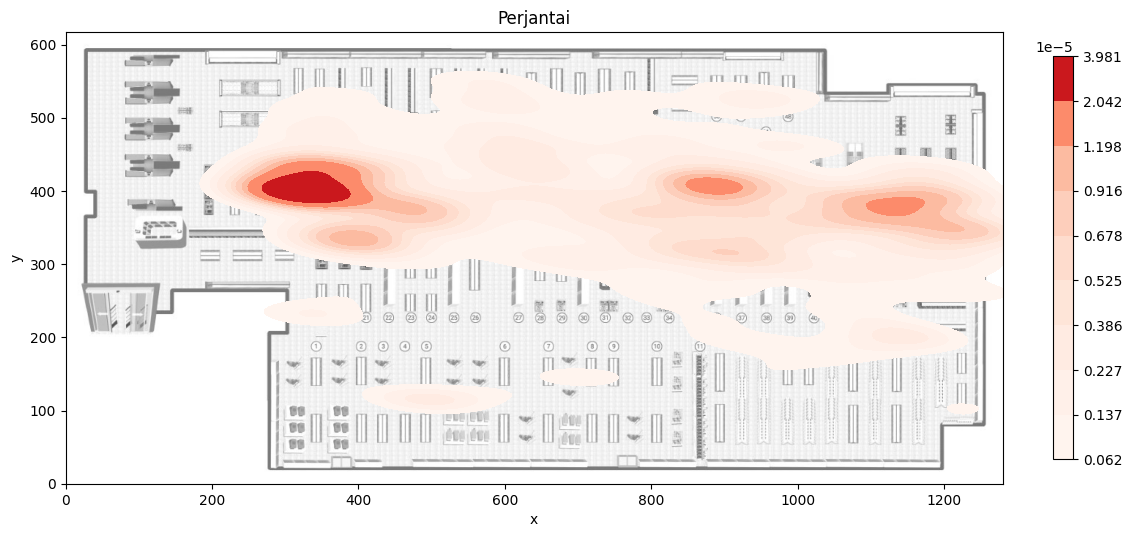

In [241]:
# Perjantai
weekday_data = df_lim_weekday[df_lim_weekday['weekday'] == 'Friday'] 

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Perjantai')

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3470473774.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/3470473774.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


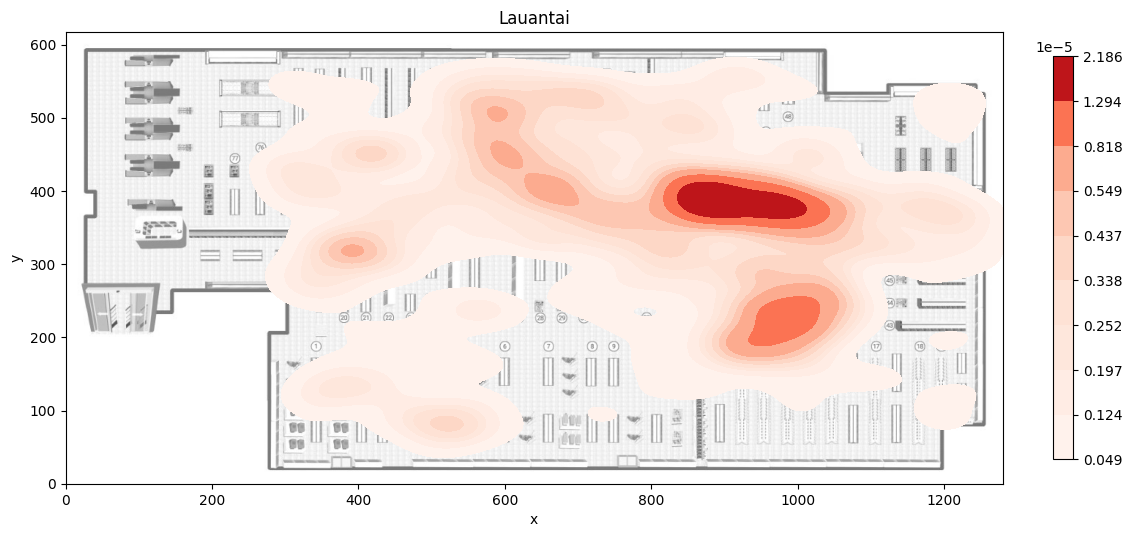

In [242]:
# Lauantai
weekday_data = df_lim_weekday[df_lim_weekday['weekday'] == 'Saturday'] 

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Lauantai')

# Näytä kuva
plt.show()

/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/1449611169.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.15`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)
/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/1449611169.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)


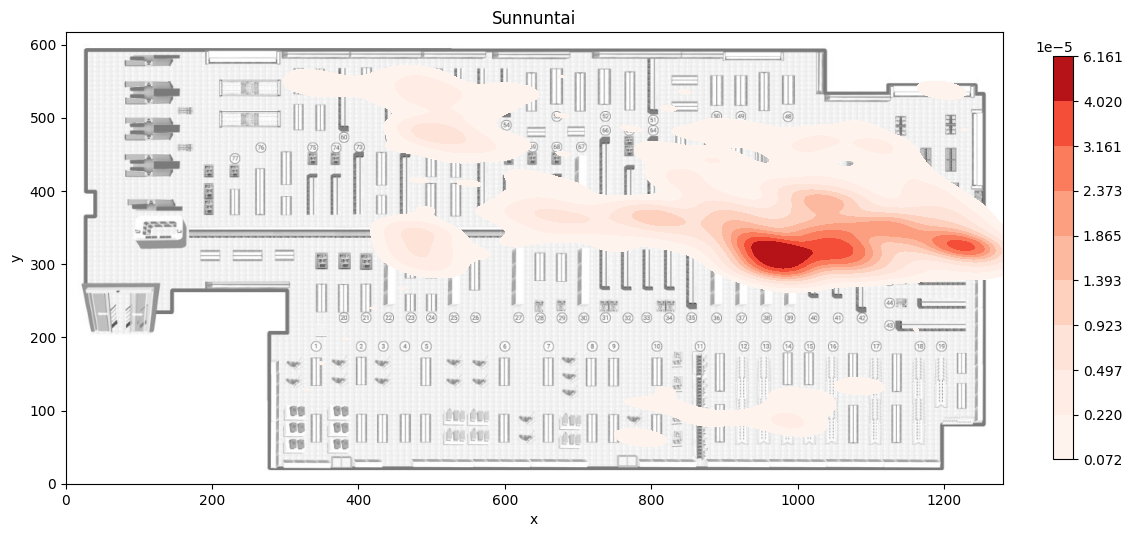

In [243]:
# Sunnuntai
weekday_data = df_lim_weekday[df_lim_weekday['weekday'] == 'Sunday'] 

# Koko, jolla kuva näytetään
plt.figure(figsize=(13, 13))

# Lämpökartta
hmax = sns.kdeplot(data=weekday_data, x='x', y='y', cmap="Reds", shade=True, bw=.15, alpha=1)

# Näytä pohjakartta, lisätään lämpöä osoittava pylväs ja lisätään otsikko
plt.imshow(img, zorder=0, extent=[0, img_width, 0, img_height], alpha=1)
plt.colorbar(hmax.collections[0], fraction=0.02)
plt.title('Sunnuntai')

# Näytä kuva
plt.show()

## Tilastoja näistä aikaväleistä, sekä viikonpäivistä

Suosituin aika käydä kaupassa on klo 16


/var/folders/h2/rx0448xd29n3594shxkq25f00000gn/T/ipykernel_90309/248615195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lim['hour'] = df_lim['timestamp'].dt.hour


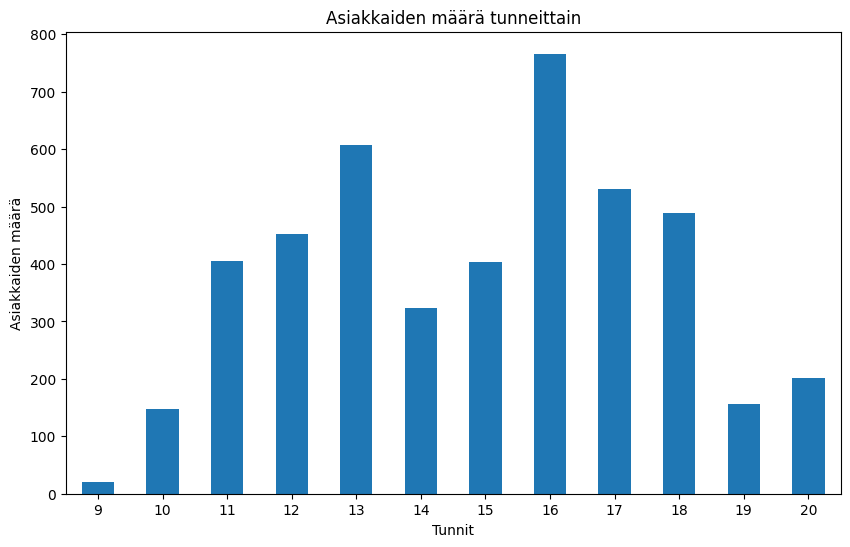

In [244]:
# Tehdään funktio, jossa palautetaan tunnit
def hourly(df_lim):
    # Laitetaan vain aikaväli 9-21, kun kauppa taisi olla auki vain tällä välillä?
    df_lim = df_lim[(df_lim['timestamp'].dt.hour >= 9) & (df_lim['timestamp'].dt.hour <= 21)]
    df_lim['hour'] = df_lim['timestamp'].dt.hour
    return df_lim

# Uusi frame
df_lim_hour = hourly(df_lim)

# Lasketaan asiakkaiden määrä
count = df_lim_hour['hour'].value_counts()

# Lasketaan suosituin aika
most_common = count.idxmax()

# Tulostetaan suosituin aika
print("Suosituin aika käydä kaupassa on klo", most_common)

# Luodaan pylväsdiagrammi
plt.figure(figsize=(10, 6))
count.sort_index().plot(kind='bar')
plt.xlabel('Tunnit')
plt.ylabel('Asiakkaiden määrä')
plt.title('Asiakkaiden määrä tunneittain')
plt.xticks(rotation=0)
plt.show()

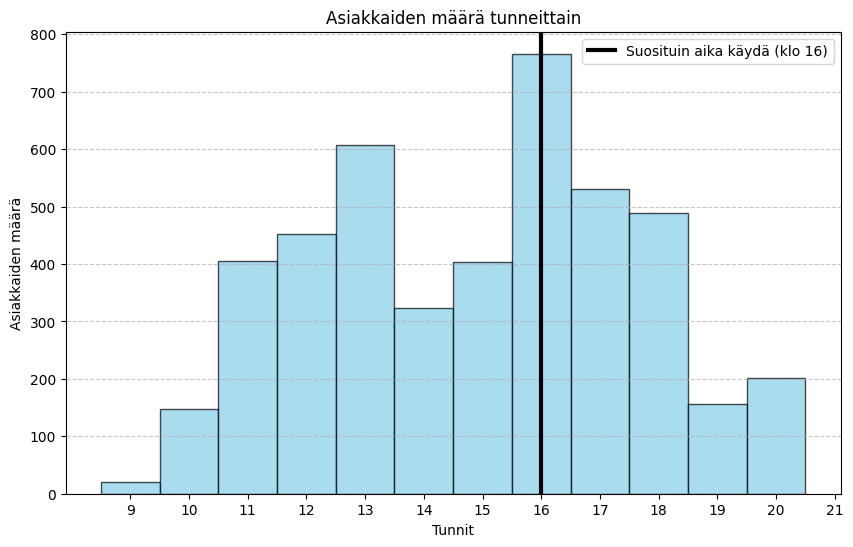

In [245]:
# Tehdään funktio, jossa palautetaan tunnit
start_hour = 9
end_hour = 21

# Suodatetaan DataFrame aikavälin perusteella
selected_data = df_lim[(df_lim['timestamp'].dt.hour >= start_hour) & (df_lim['timestamp'].dt.hour < end_hour)]

# 14-15 jäi tyhjä väli niin tämä korjattiin
bin = np.arange(start_hour, end_hour + 1) - 0.5

# Luodaan histogrammi
plt.figure(figsize=(10, 6))
plt.hist(selected_data['timestamp'].dt.hour, bins=bin, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=16, color='black', linestyle='-', linewidth=3, label='Suosituin aika käydä (klo 16)')
plt.xlabel('Tunnit')
plt.ylabel('Asiakkaiden määrä')
plt.title('Asiakkaiden määrä tunneittain')
plt.xticks(range(9, 22))
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Suosituin viikonpäivä käydä kaupassa on Friday


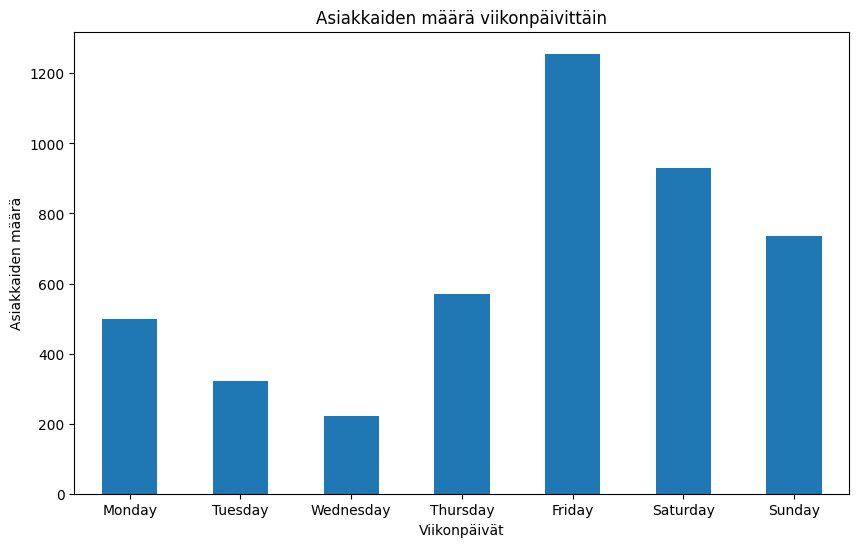

In [246]:
# Käytetään ylempänä tehtyä viikonpäivä funktiota
df_lim_weekday = weekday(df_lim)

# Lasketaan asiakkaiden määrä
count = df_lim_weekday['weekday'].value_counts()

# Laitetaan oikeaan järjestykseen
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_count = count.reindex(days)

# Lasketaan suosituin aika
most_common = sorted_count.idxmax()

# Tulostetaan suosituin aika
print("Suosituin viikonpäivä käydä kaupassa on", most_common)

# Luodaan pylväsdiagrammi
plt.figure(figsize=(10, 6))
sorted_count.plot(kind='bar')
plt.xlabel('Viikonpäivät')
plt.ylabel('Asiakkaiden määrä')
plt.title('Asiakkaiden määrä viikonpäivittäin')
plt.xticks(rotation=0)
plt.show()

Suosituin viikonpäivä käydä kaupassa on Friday


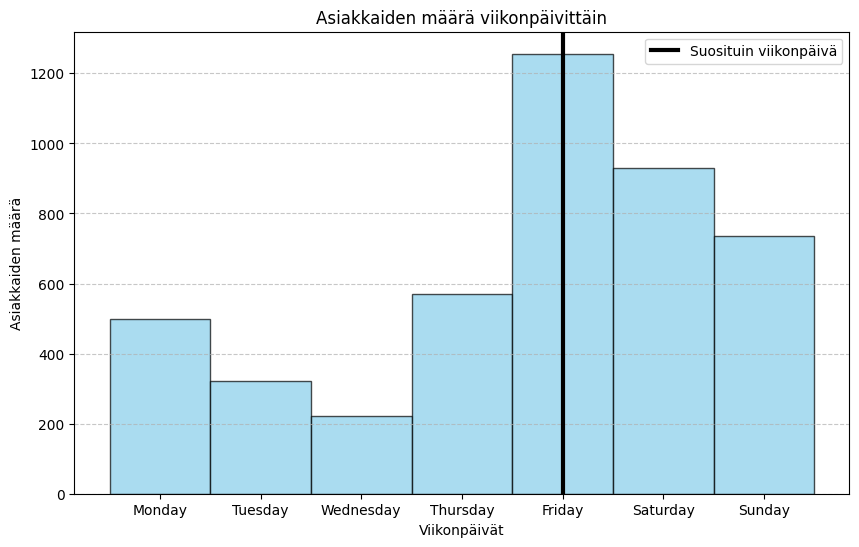

In [247]:
# Käytetään ylempänä tehtyä viikonpäivä funktiota
df_lim_weekday = weekday(df_lim)

# Lasketaan asiakkaiden määrä
count = df_lim_weekday['weekday'].value_counts()

# Laitetaan oikeaan järjestykseen
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_count = count.reindex(days)

# Lasketaan suosituin aika
most_common = sorted_count.idxmax()

# Tulostetaan suosituin aika
print("Suosituin viikonpäivä käydä kaupassa on", most_common)

# Luodaan histogrammi
plt.figure(figsize=(10, 6))
plt.bar(sorted_count.index, sorted_count, color='skyblue', edgecolor='black', alpha=0.7, width=1)
plt.axvline(x=most_common, color='black', linestyle='-', linewidth=3, label='Suosituin viikonpäivä')
plt.xlabel('Viikonpäivät')
plt.ylabel('Asiakkaiden määrä')
plt.title('Asiakkaiden määrä viikonpäivittäin')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()